In [129]:
# https://nbviewer.jupyter.org/github/jmportilla/Udemy-notes/blob/master/Intro%20to%20Data%20Projects%20-%20Titanic.ipynb

import pandas as pd

In [130]:
titanic_df = pd.read_csv('train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [131]:
# Get overall information for the dataset
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Make a list of question

- Who were the passengers on the Titanic? (Ages, Gender, Class ...)
- What deck were the passengers on and how does that relate to their class?
- Where did the passengers come from?
- Who was alone and who was with family?
- 
- What factors helped someone survive the sinking?

### 1. Who were the passengers on the Titanic?

In [132]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

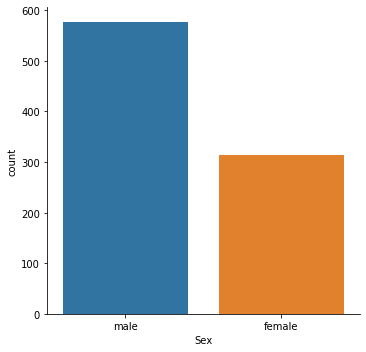

In [133]:
# Checking gender
# sns.factorplot('Sex',data=titanic_df) X

#1
sns.catplot('Sex', data = titanic_df, kind = "count")

# sns.catplot(): https://seaborn.pydata.org/generated/seaborn.catplot.html

(array([577.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 314.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

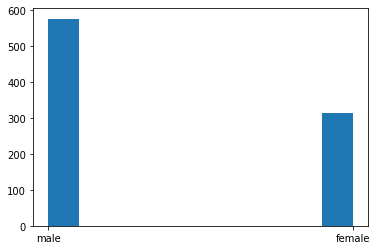

In [134]:
#2
plt.hist('Sex',data=titanic_df)

#### Relationship between Sex and Pclass

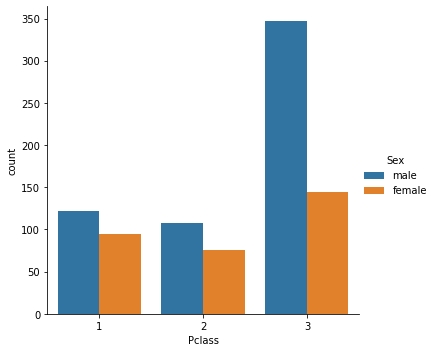

In [135]:
#1
sns.catplot('Pclass', data=titanic_df, hue='Sex', kind = 'count')

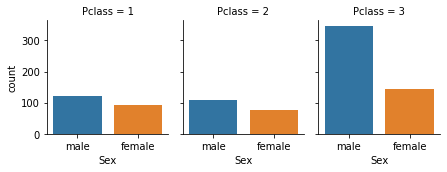

In [136]:
#2
sns.catplot("Sex", col="Pclass", col_wrap=4,
                data=titanic_df,
                kind="count", height=2.5, aspect=.8)

In [137]:
# Consider the child is yonger than 16.
# Older than 16 will be divided with male and female

def male_female_child(passenger):
    # Take the Age and Sex
    age,sex = passenger
    # Compare the age, otherwise leave the sex
    if age < 16:
        return 'child'
    else:
        return sex

# create new feature called 'person'
# In person feature, if age is younger than 16, he/she will be considered as a child
# If age is same or older than 16, people will be distinguished with male and female
titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child,axis=1)

In [138]:
titanic_df.head()
# seperated the passengers between female,male,and child.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [139]:
titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

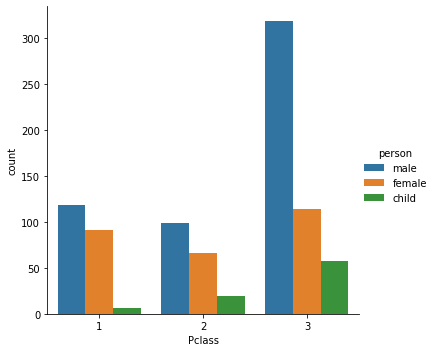

In [140]:
#1
sns.catplot('Pclass', data=titanic_df, hue='person', kind = 'count')

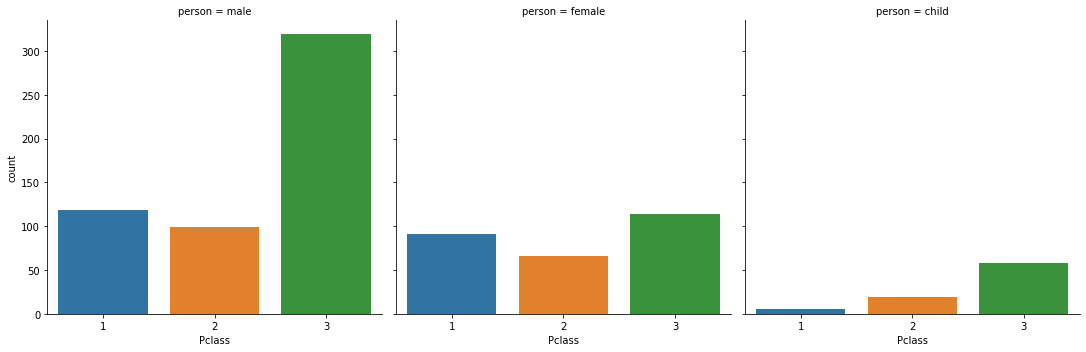

In [141]:
#2
sns.catplot('Pclass', col = 'person', data=titanic_df, kind = 'count')

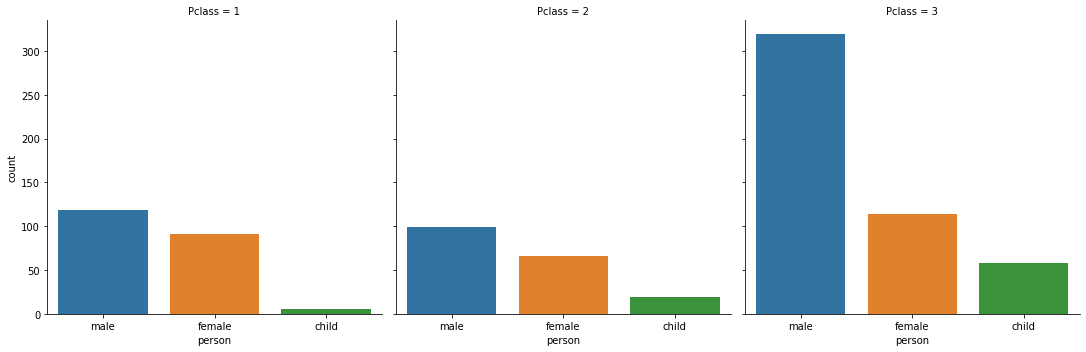

In [142]:
#3
sns.catplot('person', col = 'Pclass', data=titanic_df, kind = 'count')

In [143]:
sns.FacetGrid('person', col = 'Pclass', data=titanic_df, kind = 'count')

TypeError: __init__() got multiple values for argument 'data'

In [ ]:
titanic_df['Age'].hist(bins = 80)
# quick way to see a histogram of age, using pandas

##### sns.catplot: Stata module for plots of frequencies, fractions or percents of categorical data
##### sns.FaceGrid: Multi-plot grid for plotting conditional relationships.

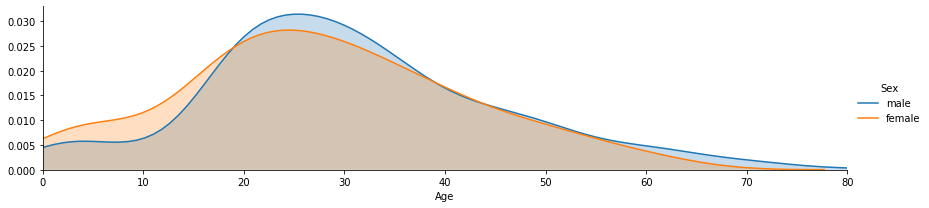

In [144]:
#4
#sns.FaceGrid(): https://seaborn.pydata.org/generated/seaborn.FacetGrid.html

# Set the figure equal to a facetgrid with the pandas dataframe as its data source, set the hue, and change the aspect ratio.
fig = sns.FacetGrid(titanic_df, hue="Sex",aspect=4)

# Next use map to plot all the possible kdeplots for the 'Age' column by the hue choice
fig.map(sns.kdeplot,'Age',shade= True)
# this graph includes negative age

# Set the x max limit by the oldest passenger
oldest = titanic_df['Age'].max()

#Since we know no one can be negative years old set the x lower limit at 0
fig.set(xlim=(0,oldest))

#Finally add a legend
fig.add_legend()

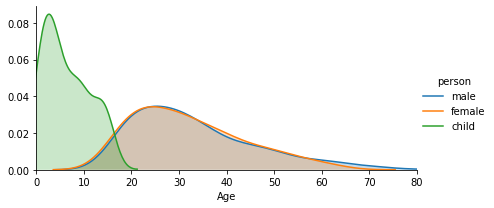

In [145]:
# person(child, male, female)
fig = sns.FacetGrid(titanic_df, hue = 'person', aspect = 2)
fig.map(sns.kdeplot,'Age',shade= True)

fig.set(xlim=(0,titanic_df['Age'].max()))
fig.add_legend()

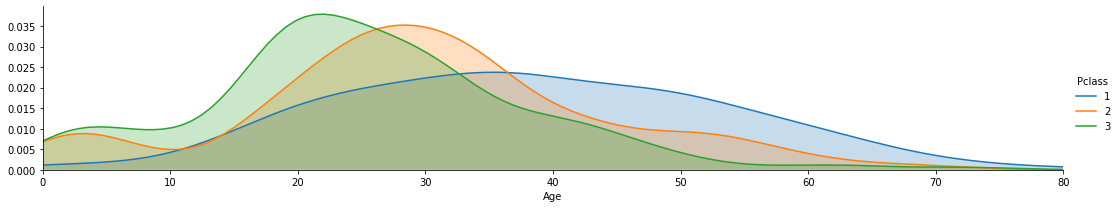

In [146]:
# Pclass(1, 2, 3)
fig = sns.FacetGrid(titanic_df, hue = 'Pclass', aspect = 5)
fig.map(sns.kdeplot,'Age',shade= True)

fig.set(xlim=(0,titanic_df['Age'].max()))
fig.add_legend()

### 2. What deck were the passengers on and how does that relate to their class?

In [147]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


In [148]:
deck = titanic_df['Cabin'].dropna()

# drop NaN(null) data in feature, 'Cabin'

In [149]:
deck.head()

1      C85
3     C123
6      E46
10      G6
11    C103
Name: Cabin, dtype: object

##### Notice we only need the first letter of the deck to classify its level (e.g. A,B,C,D,E,F,G)

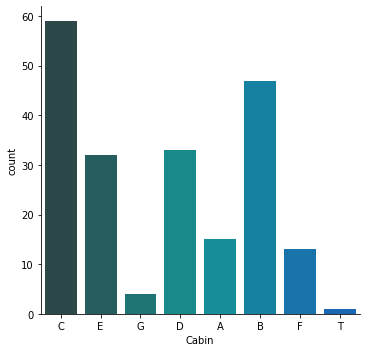

In [150]:
# delete the numeric value after the character (str)
# ex) C103 -> C

levels = []

for level in deck:
    levels.append(level[0])
    
cabin_df = pd.DataFrame(levels)
cabin_df.columns = ['Cabin']
sns.catplot('Cabin', data = cabin_df, kind = 'count', palette='winter_d')

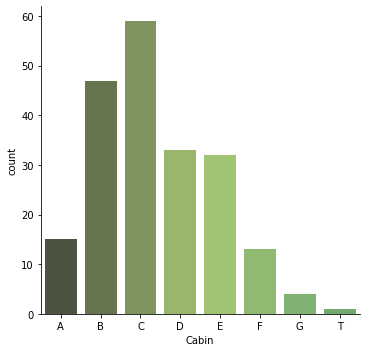

In [151]:
# line up with alphabetic
cabin_df.sort_values('Cabin', inplace = True)
sns.catplot('Cabin', data = cabin_df, kind = 'count', palette='summer_d')

### 3. Where did the passengers come from?

In [152]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male


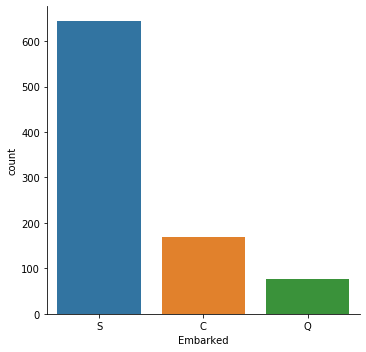

In [153]:
# Embarked
#1
embarked_df = pd.DataFrame(titanic_df['Embarked'])

sns.catplot('Embarked', data = embarked_df, kind = 'count')

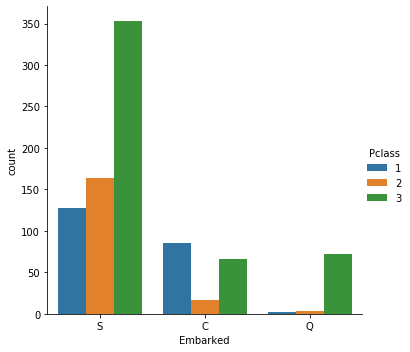

In [154]:
#2
sns.catplot('Embarked', data = titanic_df, kind = 'count', hue = 'Pclass')

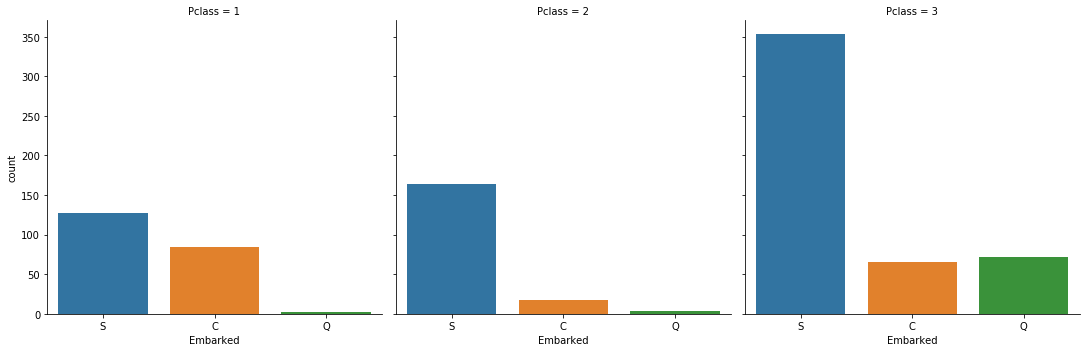

In [155]:
#3
sns.catplot('Embarked', col = 'Pclass', data = titanic_df, kind = 'count')

### 4. Who was alone and who was with family?

In [156]:
# make new feature 'Alone'
# Alone will be sum of SibSp and Parch

titanic_df['Alone'] = titanic_df.Parch + titanic_df.SibSp
titanic_df['Alone'].head()

0    1
1    1
2    0
3    1
4    0
Name: Alone, dtype: int64

In [157]:
titanic_df['Alone_1'] = titanic_df['Parch'] + titanic_df['SibSp']
titanic_df['Alone_1'].head()

0    1
1    1
2    0
3    1
4    0
Name: Alone_1, dtype: int64

In [158]:
titanic_df.drop('Alone_1', axis =1, inplace = True)

In [159]:
# num > 0: with family
# num == 0: aline
titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'With Family'
titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

In [160]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


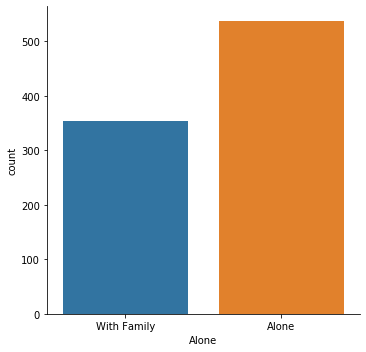

In [161]:
sns.catplot('Alone', data = titanic_df, kind =  'count')

### 5. What factors helped someone survive the sinking?

In [162]:
# compare the num of survival
# 0: No, 1: Yes

#1 (word)
titanic_df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

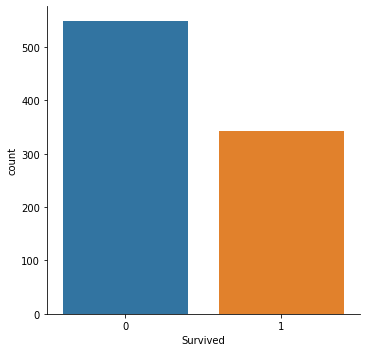

In [163]:
#2 (histogram)
sns.catplot('Survived', data = titanic_df, kind = 'count')

In [164]:
titanic_df['Survived'].mean()

0.3838383838383838

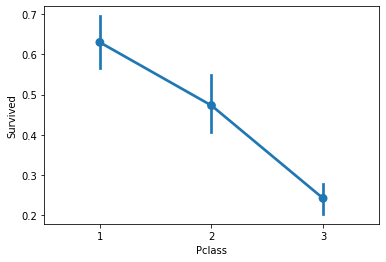

In [181]:
# Relation between Survived and Pclass
# sns.factorplot('Pclass','Survived',data=titanic_df) X

#1
sns.pointplot('Pclass','Survived', data = titanic_df)

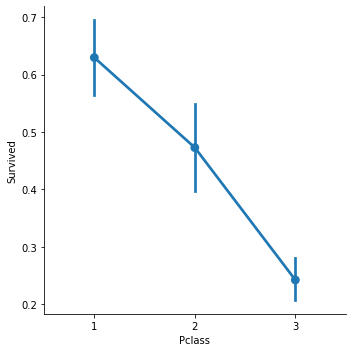

In [183]:
# 2
sns.catplot('Pclass','Survived', data = titanic_df, kind = 'point')

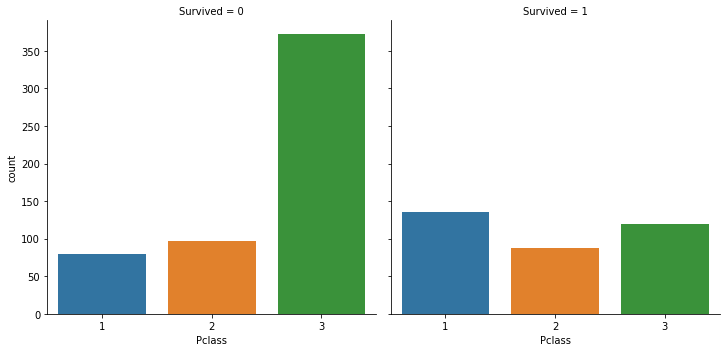

In [184]:
# 3
sns.catplot('Pclass', col = 'Survived', data = titanic_df, kind = 'count')

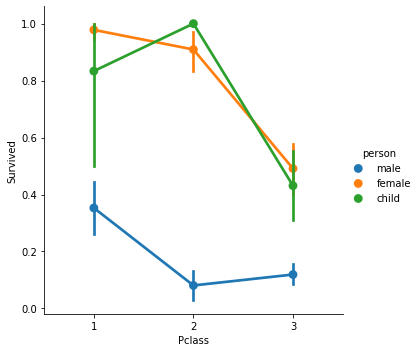

In [185]:
# Pclass, Survived, person(child, male, female)
#1
sns.catplot('Pclass', 'Survived', data = titanic_df, hue = 'person', kind = 'point')

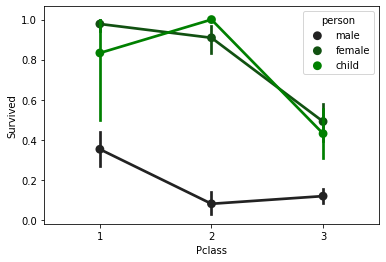

In [190]:
# 2
sns.pointplot('Pclass', 'Survived', hue = 'person', data = titanic_df, color = 'green')

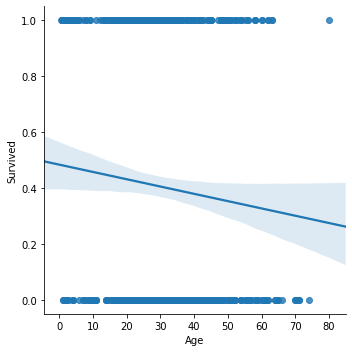

In [191]:
# Let's use a linear plot on age versus survival
sns.lmplot('Age','Survived',data=titanic_df)
# age 80(oldest person) was survived

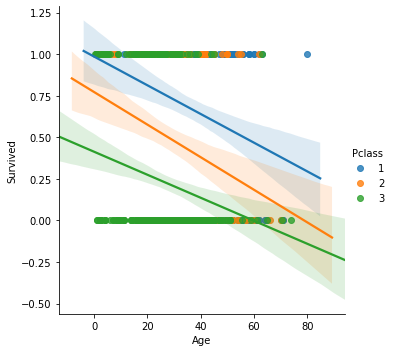

In [194]:
sns.lmplot('Age','Survived',data=titanic_df, hue = 'Pclass')
# Generally, higher class passenger survived

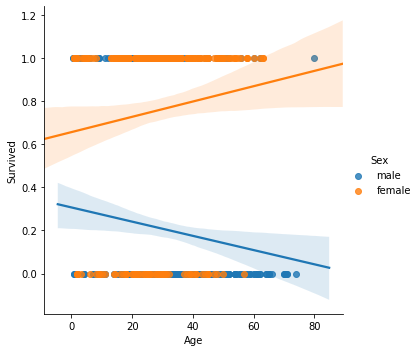

In [197]:
sns.lmplot('Age','Survived',data=titanic_df, hue = 'Sex')
# usually, female passenger survied more

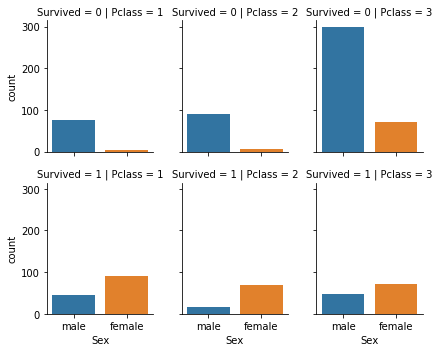

In [199]:
sns.catplot("Sex", col="Pclass",
                row = 'Survived',
                data=titanic_df,
                kind="count", height=2.5, aspect=.8)